<a href="https://colab.research.google.com/github/AKIRAAKAME/Projeto-ImersaoAI-Alura-Google/blob/main/Projeto_Alura_Imers%C3%A3o_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalando o SDK do Google
!pip install -q -U google-generativeai

In [33]:
#Importações e configurações iniciais
import google.generativeai as genai
from google.colab import userdata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

api_key = userdata.get("SECRET_KEY")
genai.configure(api_key=api_key)

In [ ]:
#Listando os modelos disponíveis
for m in genai.list_models():
  if "generateContent" in m.supported_generation_methods:
    print(m.name)

In [ ]:
#Listagem de documentos que serão buscados
'''estrutura do documento para ficar mais fácil o ctrl c ctrl v
DOCUMENT = {
    "Título":"",
    "Conteúdo":"",}
'''
DOCUMENT1 = {
    "Título": "O que aconteceu com o Rio Grande do Sul?",
    "Conteúdo": "O Rio Grande do Sul sofreu recentemente com eventos climáticos extremos.  Chuvas fortes e persistentes causaram enchentes e deslizamentos devastadores.  Há relatos de vítimas fatais e muitos desabrigados.Alguns fatores contribuíram para a gravidade da situação:Mudanças climáticas: Especialistas apontam que o aquecimento global intensifica eventos climáticos extremos como tempestades e inundações.Falta de prevenção: Apesar de episódios semelhantes em 2023, parece não ter havido ações preventivas suficientes para mitigar os danos.Há iniciativas de ajuda humanitária em andamento. Você pode encontrar informações sobre doações buscando por SOS RS.",}
DOCUMENT2 = {
    "Título": "Como ajudar o Rio Grande do Sul?",
    "Conteúdo": "Doações:Itens de primeira necessidade: Alimentos não perecíveis, água potável, produtos de higiene pessoal, roupas, colchões, cobertores e materiais de limpeza.Doação de sangue: Procure um hemocentro local.Doação de livros infantis: Diversas campanhas estão arrecadando livros para as crianças afetadas pelas enchentes.Trabalho voluntário:ONGs e entidades locais: Entre em contato com ONGs e entidades em sua região para saber como você pode ajudar.Defesa Civil: A Defesa Civil do Rio Grande do Sul precisa de voluntários para auxiliar na organização de doações e no atendimento às vítimas.Cozinhas comunitárias: Diversas cozinhas comunitárias estão precisando de ajuda para preparar e distribuir refeições para as pessoas desabrigadas.Outras formas de ajudar.Compartilhe informações: Divulgue nas redes sociais as campanhas de doação e as necessidades das vítimas.Conscientize: Incentive a discussão sobre as mudanças climáticas e a importância da prevenção de desastres.Ofereça seus serviços: Se você possui alguma habilidade específica, como encanador, eletricista ou psicólogo, você pode oferecer seus serviços voluntariamente.",}
DOCUMENT3 = {
    "Título": "Onde faço doações de itens?",
    "Conteúdo": "Doações de itens:Pontos de coleta (lista atualizada no site da Defesa Civil RS: https://www.defesacivil.rs.gov.br/central-de-doacoes)Entrega direta em ONGs e entidades locais (lista de ONGs confiáveis no site do Conselho Estadual da Juventude RS: https://conjuvers.wordpress.com/)Campanhas de doação (informações nas redes sociais ou sites como https://www.vakinha.com.br/)"}
DOCUMENT4 = {
    "Título": "Como faço doações em dinheiro?:",
    "Conteúdo": "Pix: sosrs@federasul.com.brDepósito bancário (dados da conta no site da campanha SOS Rio Grande do Sul: https://sosenchentes.rs.gov.br/)Cartões de crédito (no site da campanha SOS Rio Grande do Sul: https://sosenchentes.rs.gov.br/)",}
DOCUMENT5 = {
    "Título": "Como faço para me inscrever em trabalhos voluntários?",
    "Conteúdo": "Trabalho voluntário:Defesa Civil RS (cadastro de voluntários no site: https://www.defesacivil.rs.gov.br/central-de-doacoes)ONGs e entidades locais (lista de ONGs confiáveis no site do Conselho Estadual da Juventude RS: https://conjuvers.wordpress.com/)",}
DOCUMENT6 = {
    "Título": "Medidas de prevenção de desastres futuros",
    "Conteúdo": "As inundações no Rio Grande do Sul expõem a necessidade urgente de medidas para prevenir desastres semelhantes no futuro. As ações devem ser tomadas em diferentes níveis:Governo:Políticas públicas: Implementar e fortalecer políticas públicas de gestão de risco de desastres, incluindo mapeamento de áreas de risco, planos de contingência e sistemas de alerta precoce.Infraestrutura: Investir em infraestrutura resiliente, como barragens, drenagens e sistemas de saneamento, para minimizar os impactos de eventos climáticos extremos.Ordenamento territorial: Implementar políticas de ordenamento territorial que evitem a ocupação de áreas de risco, como encostas e várzeas de riosEducação e conscientização: Promover campanhas de educação e conscientização sobre os riscos de desastres e medidas de autoproteção para a população.Sociedade civil:Organização comunitária: Fortalecer a organização comunitária para o desenvolvimento de planos de resposta a desastres e ações de ajuda mútua.Participação social: Cobrar dos governantes a implementação de políticas públicas eficazes de gestão de risco de desastres e acompanhar sua efetividade.Voluntariado: Participar de ações de voluntariado em ONGs e entidades que trabalham na prevenção e resposta a desastres.Adaptação individual: Adotar medidas de adaptação individual, como ter um plano de emergência familiar e saber como agir em caso de desastre.Mudanças climáticas:Combate às mudanças climáticas: Reduzir as emissões de gases de efeito estufa para mitigar os impactos da mudança climática e a intensificação de eventos climáticos extremos.Transição para energias renováveis: Investir em fontes de energia renováveis e sustentáveis para reduzir a dependência de combustíveis fósseis e combater as mudanças climáticas.Adaptação à mudança climática: Desenvolver e implementar estratégias de adaptação à mudança climática para lidar com os impactos inevitáveis, como elevação do nível do mar e eventos climáticos extremos mais frequentes e intensos.É crucial que todos os setores da sociedade trabalhem juntos para construir um futuro mais resiliente aos desastres. Ações conjuntas e medidas preventivas podem salvar vidas, proteger o meio ambiente e reduzir os danos materiais causados por eventos climáticos extremos.Lembre-se: A prevenção é sempre melhor que a remediação. Investir em medidas preventivas agora pode evitar tragédias como a do Rio Grande do Sul no futuro.",}
DOCUMENT7 = {
    "Título": "Situação dos abrigos no Rio Grande do sul",
    "Conteúdo": "Superlotação, falta de recursos e infraestrutura precária marcam a realidade dos abrigos. Pessoas sofrem com traumas psicológicos e incerteza sobre o futuro, enquanto animais estão em risco de doenças e sofrem com o abandono.Movimento de solidariedade tenta amenizar a situação, mas doações e trabalho voluntário precisam ser direcionados às necessidades mais urgentes.A união de todos é crucial para superar este momento difícil e reconstruir a vida daqueles que foram afetados pelas enchentes.",}
DOCUMENT8 = {
    "Título":"Regiões mais Afetadas",
    "Conteúdo":"Região Metropolitana de Porto Alegre:Canoas,Alvorada,Gravataí,Cachoeirinha,Viamão,Sapucaia do Sul.Porto Alegre (bairros: Centro Histórico, Restinga, Lomba do Pinheiro, Menino Deus, entre outros).Vale do Caí:São Leopoldo,Novo Hamburgo,Estrela,Feliz,Montenegrino.Vale do Jacuí:Santa Maria,Cachoeiro do Sul,Rio Pardo,Agudo,Alegrete.Planalto Médio:Passo Fundo,Carazinho,Erechim,Getúlio Vargas.Noroeste:Santo Ângelo,Ijuí,Frederico Westphalen,Três Passos. Outras Regiões Afetadas:Sul:Pelotas, Rio Grande, Bagé.Sudoeste: Uruguaiana, Quaraí, Santana do Livramento.Centro-Sul: Santa Cruz do Sul, Venâncio Aires, Lajeado.Missões: Santo Ângelo, São Miguel das Missões, Cerro Largo.",}
DOCUMENT9 = {
    "Título":"Lista de suprimentos necessários",
    "Conteúdo":"Suprimentos:Água potável: Pelo menos 4 litros de água por pessoa por dia, Guarde água em recipientes limpos e vedados. Alimentos não perecíveis: Alimentos enlatados,Cereais,Leite em pó,Biscoitos,Barras de granola,Frutas secas,Nozes. Fórmulas infantis e alimentos para bebês: Suficiente para pelo menos 72 horas, Certifique-se de ter mamadeiras, chupetas e outros itens necessários. Kits de primeiros socorros: Um kit de primeiros socorros bem abastecido com suprimentos básicos, como bandagens, antissépticos, pomada antibiótica e medicamentos para dor.Medicamentosbásicos:Analgésicos,Antitérmicos,Anti-inflamatórios,Medicamentos para alergia,Medicamentos para problemas estomacais,Medicamentos para doenças cardíacas,Outros medicamentos prescritos. Materiais de limpeza:Água sanitária,Sabão,Detergente,Desinfetante para as mãos,Sacos de lixo,Panos de limpeza. Itens de higiene pessoal:Sabonete,Shampoo,Condicionador,Pasta de dente,Escova de dente,Fio dental,Papel higiênico,Absorventes higiênicos,Fraldas descartáveis (crianças e adultos),Lenços umedecidos,Toalha de banho. Roupas: Roupas para todas as idades e tamanhos (principalmente roupas íntimas),Roupas quentes para o clima frio,Capas de chuva,Calçados. Outros suprimentos: Cobertores,Toalhas,Colchões,Sacos de dormir,Velas,Fósforos,Lanternas,Pilhas,Rádio AM/FM a bateria,Carregador de celular,Kit de ferramentas,Dinheiro em espécie,Documentos importantes.Kit de costura,Repelente contra mosquitos,Protetor solar,Kit de higiene bucal,Brinquedos e livros para crianças,Comida e água para animais de estimação.",}
documents = [DOCUMENT1, DOCUMENT2, DOCUMENT3, DOCUMENT4, DOCUMENT5, DOCUMENT6, DOCUMENT7, DOCUMENT8, DOCUMENT9]

In [ ]:
df = pd.DataFrame(documents)
df.columns = ["Titulo", "Informações"]
df

In [ ]:
model = "models/embedding-001"

In [ ]:
def embed_fn(title, text):
  return genai.embed_content(model=model,
                                 content=text,
                                 title=title,
                                 task_type="RETRIEVAL_DOCUMENT")["embedding"]

In [ ]:
df["Embeddings"] = df.apply(lambda row: embed_fn(row["Titulo"], row["Informações"]), axis=1)
df

In [ ]:
def gerar_e_buscar_consulta(consulta, base, model):
  embedding_da_consulta = genai.embed_content(model=model,
                                 content=consulta,
                                 task_type="RETRIEVAL_QUERY")["embedding"]

  produtos_escalares = np.dot(np.stack(df["Embeddings"]), embedding_da_consulta)

  indice = np.argmax(produtos_escalares)
  return df.iloc[indice]["Informações"]

In [ ]:
consulta = "Como faço para ajudar o Rio Grande do Sul?"

trecho = gerar_e_buscar_consulta(consulta, df, model)
print(trecho)

In [ ]:
generation_config = {
  "temperature": 0,
  "candidate_count": 1,
}

In [24]:
prompt = f"Reescreva esse texto de uma forma resumida, afim de responder completamente a pergunta feita pelo usuário: {trecho}"

model_2 = genai.GenerativeModel("models/gemini-1.0-pro",
                                generation_config=generation_config)
response = model_2.generate_content(prompt)
print(response.text)

**Como ajudar as vítimas das enchentes:**

* **Doações:** Alimentos não perecíveis, água, produtos de higiene, roupas, colchões, cobertores, materiais de limpeza.
* **Doação de sangue:** Procure um hemocentro local.
* **Doação de livros infantis:** Participe de campanhas de arrecadação.
* **Trabalho voluntário:**
    * ONGs e entidades locais: Entre em contato para saber como ajudar.
    * Defesa Civil: Auxilie na organização de doações e atendimento às vítimas.
    * Cozinhas comunitárias: Ajude a preparar e distribuir refeições.
* **Outras formas:**
    * Compartilhe informações sobre doações e necessidades.
    * Conscientize sobre mudanças climáticas e prevenção de desastres.
    * Ofereça serviços específicos (encanador, eletricista, psicólogo).


Documentação feita e funcionando
part 2 - Adicionar o chatbot para facilitar as respostas


In [ ]:
safety_settings = {
    "HARASSMENT": "BLOCK_NONE",
    "HATE": "BLOCK_NONE",
    "SEXUAL": "BLOCK_NONE",
    "DANGEROUS": "BLOCK_NONE",
}

In [ ]:
response = model.generate_content("Mapeamento das Necessidades Pós-Enchentes.")
print(response.text)

In [ ]:
chat = model.start_chat(history=[])

In [ ]:
prompt = input("Digite sua pergunta:")

while prompt != "fim":
  response = chat.send_message(prompt)
  print("Resposta: ", response.text, " \n")
  prompt = input("Digite sua pergunta:")

In [ ]:
chat

In [ ]:
chat.history

In [ ]:
#Melhorando a visualização
#Código disponível em https://ai.google.dev/tutorials/python_quickstart#import_packages
import textwrap
from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

#Imprimindo o histórico
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))
  print('-------------------------------------------')

Código de Necessidades relativo a cada Região afetada pelas enchentes no Rio Grande do Sul

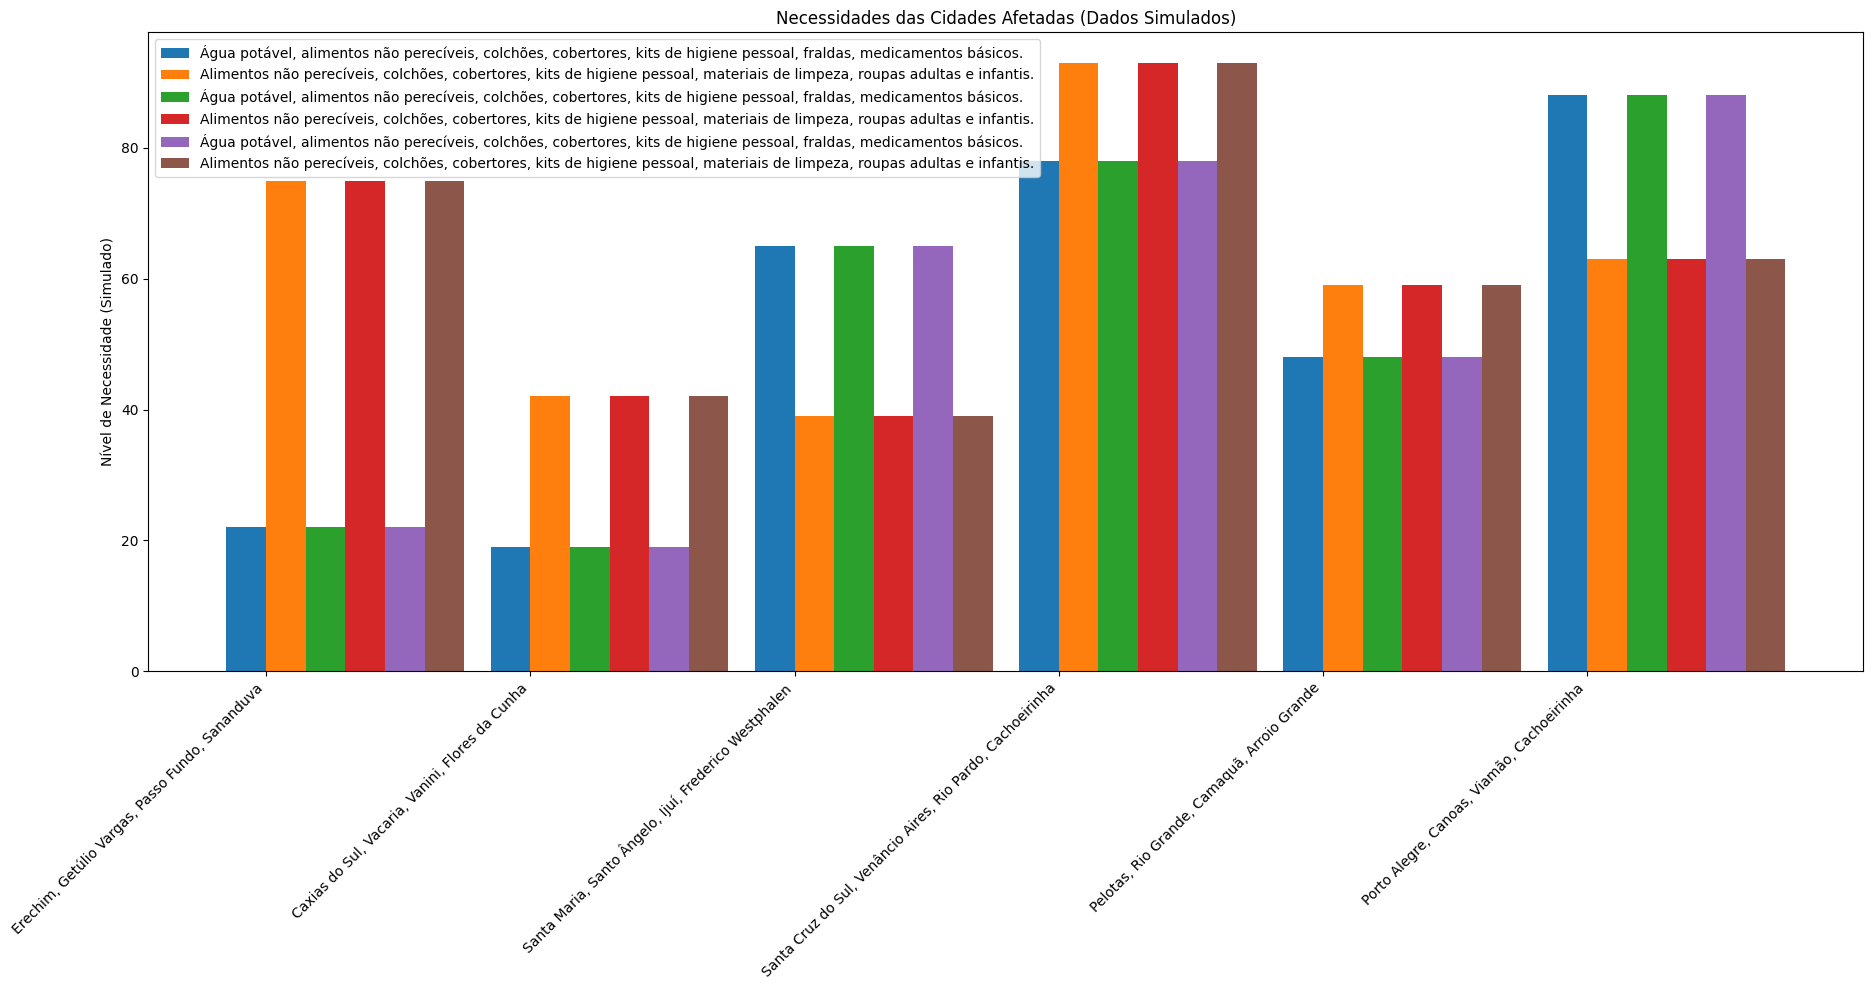

In [46]:
import matplotlib.pyplot as plt  # Importar biblioteca 'matplotlib.pyplot'

# Dados do gráfico
regioes = ['Norte', 'Nordeste', 'Noroeste', 'Centro-Oeste', 'Sul', 'Metropolitana']
locais = ['Erechim, Getúlio Vargas, Passo Fundo, Sananduva',
         'Caxias do Sul, Vacaria, Vanini, Flores da Cunha',
         'Santa Maria, Santo Ângelo, Ijuí, Frederico Westphalen',
         'Santa Cruz do Sul, Venâncio Aires, Rio Pardo, Cachoeirinha',
         'Pelotas, Rio Grande, Camaquã, Arroio Grande',
         'Porto Alegre, Canoas, Viamão, Cachoeirinha']
necessidades = [
    'Água potável, alimentos não perecíveis, colchões, cobertores, kits de higiene pessoal, fraldas, medicamentos básicos.',
    'Alimentos não perecíveis, colchões, cobertores, kits de higiene pessoal, materiais de limpeza, roupas adultas e infantis.',
    'Água potável, alimentos não perecíveis, colchões, cobertores, kits de higiene pessoal, fraldas, medicamentos básicos.',
    'Alimentos não perecíveis, colchões, cobertores, kits de higiene pessoal, materiais de limpeza, roupas adultas e infantis.',
    'Água potável, alimentos não perecíveis, colchões, cobertores, kits de higiene pessoal, fraldas, medicamentos básicos.',
    'Alimentos não perecíveis, colchões, cobertores, kits de higiene pessoal, materiais de limpeza, roupas adultas e infantis.'
]

# Gerar dados aleatórios para cada necessidade em cada cidade
dados = {cidade: {necessidade: random.randint(0, 100) for necessidade in necessidades} for cidade in locais}

# Criar o gráfico de barras
fig, ax = plt.subplots(figsize=(19, 10))  # Criar figura e eixo

# Configurar as barras
bar_width = 0.15  # Largura das barras
posicoes = range(len(locais))  # Posições das barras (0, 1, 2, ...)

# Criar barras para cada necessidade
for i, necessidade in enumerate(necessidades):
    valores = [dados[cidade][necessidade] for cidade in locais]  # Obter valores para cada cidade
    ax.bar([p + i * bar_width for p in posicoes], valores, width=bar_width, label=necessidade)  # Criar barra

# Configurar o eixo X
ax.set_xticks([p + bar_width / 2 for p in posicoes])  # Ajustar posição das marcas no eixo X
ax.set_xticklabels(locais, rotation=45, ha='right')  # Definir rótulos das marcas no eixo X

# Configurar o eixo Y
ax.set_ylabel('Nível de Necessidade (Simulado)')  # Rótulo do eixo Y

# Configurar o título do gráfico
ax.set_title('Necessidades das Cidades Afetadas (Dados Simulados)')  # Título do gráfico

# Adicionar legenda
ax.legend()  # Legenda para as barras

# Mostrar o gráfico
plt.tight_layout()  # Ajustar layout do gráfico
plt.show()
